In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv("train_eda.csv")
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

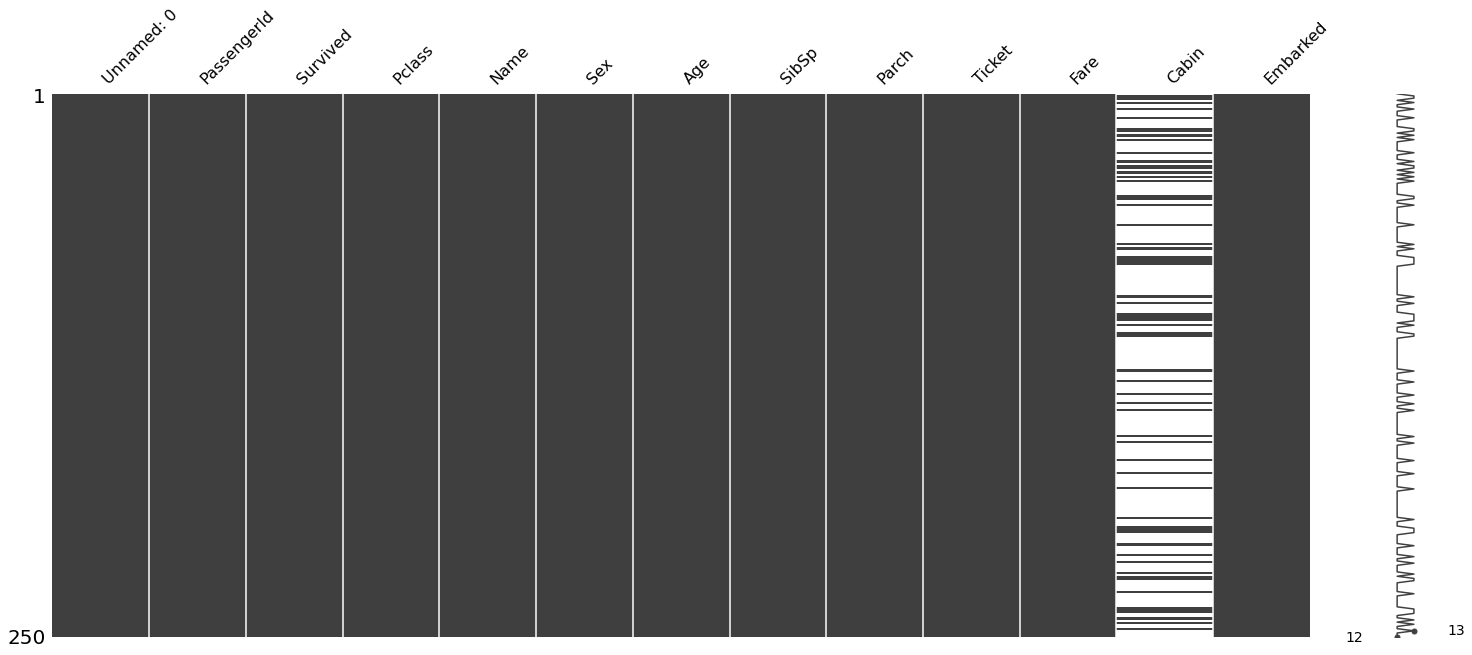

In [3]:
# Check once more for the NaN values
import missingno as msno
%matplotlib inline
msno.matrix(train.sample(250))

## First let´s get our hands into categorical columns, where dtypes= object 

In [4]:
categorical= ["Name", "Sex", "Ticket", "Cabin", "Embarked"]

In [5]:
train.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [6]:
train.Ticket
# Not relevant!

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [7]:
train.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [8]:
train.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<AxesSubplot:xlabel='Sex', ylabel='count'>

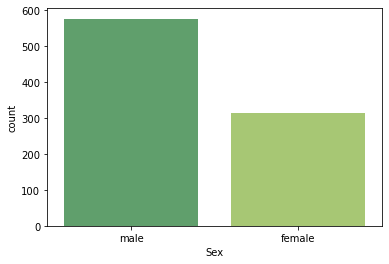

In [9]:
sns.countplot(data= train, x= "Sex", palette="summer")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

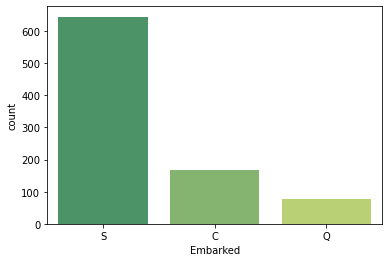

In [10]:
sns.countplot(data= train, x="Embarked", palette="summer")

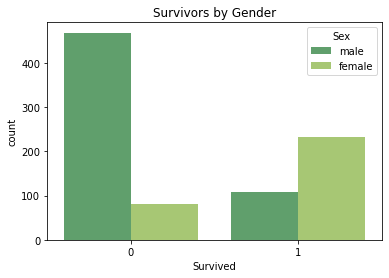

In [11]:
# Instead of just seeing how the population of the Titanic Ship was made of, let´s check this distribution for the people either they survived or not
draw= sns.countplot(data=train, x= "Survived", hue="Sex", palette= "summer")
draw.set_title("Survivors by Gender");

### Wow! Women really survived! Men in the ship were really that kind of gentleman  as Jack with Rose;)  

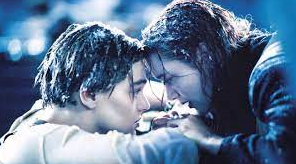

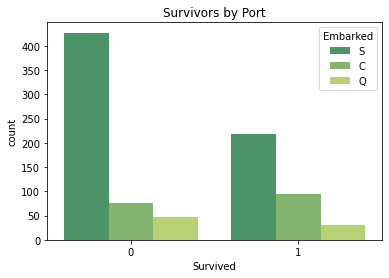

In [12]:
draw= sns.countplot(data=train, x= "Survived", hue="Embarked", palette= "summer")
draw.set_title("Survivors by Port");

## Let´s get into Numerical values and the distribution of this ones 

In [13]:
train.dtypes

Unnamed: 0       int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train= train.drop('Unnamed: 0', axis=1)

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# For loop for categorical hues checking on survivors
categories= train[["Pclass", "SibSp", "Parch", "Sex", "Embarked"]]

In [17]:
categories

,Pclass,SibSp,Parch,Sex,Embarked
0,3,1,0,male,S
1,1,1,0,female,C
2,3,0,0,female,S
3,1,1,0,female,S
4,3,0,0,male,S
...,...,...,...,...,...
886,2,0,0,male,S
887,1,0,0,female,S
888,3,1,2,female,S
889,1,0,0,male,C


Pclass count plot 



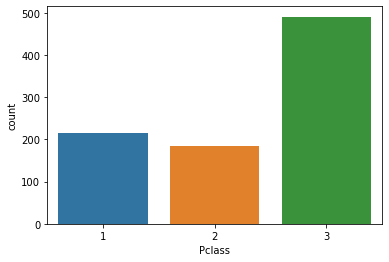

SibSp count plot 



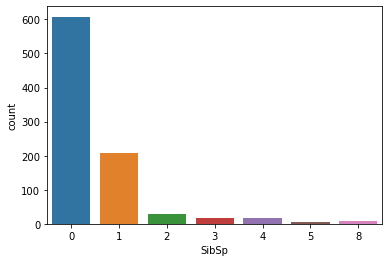

Parch count plot 



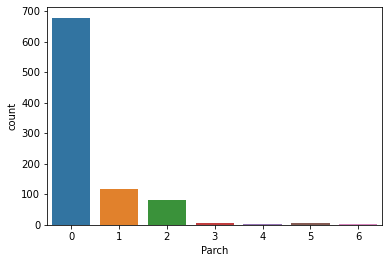

Sex count plot 



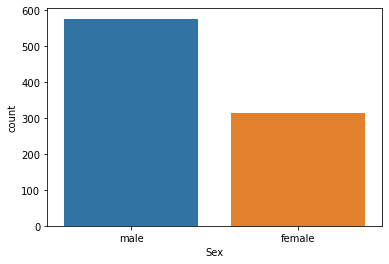

Embarked count plot 



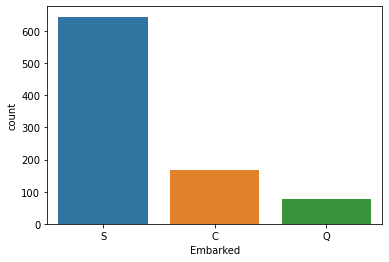

In [18]:
for col in categories:
    print(col +' count plot \n') 
    sns.countplot(x =col, data =train)
    plt.show()
       
    

Pclass count plot 



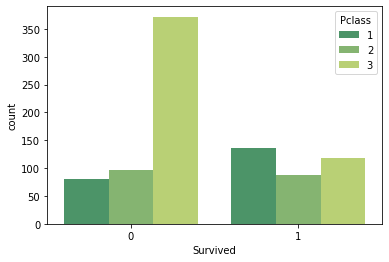

SibSp count plot 



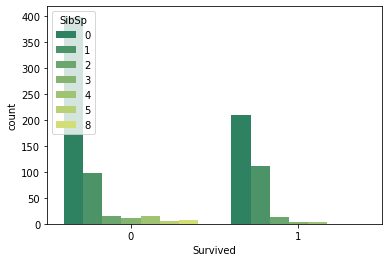

Parch count plot 



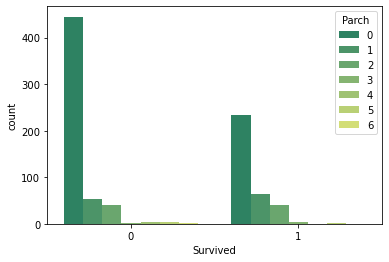

Sex count plot 



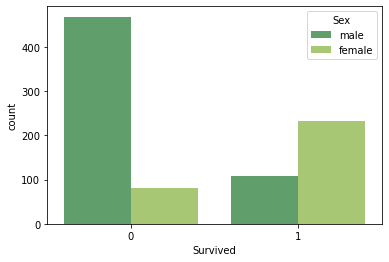

Embarked count plot 



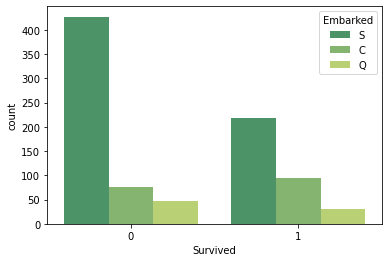

In [19]:
# Now let´s do a similar code, but in order to see the hue and with the summer palette we´ve been using for the moment.
for col in categories:
    print(col +' count plot \n') 
    draw = sns.countplot(x= train["Survived"], hue =col, data =train, palette="summer")
    plt.show()

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [21]:
# We are only left the age and the fare. The two numericals
numericals= ["Age", "Fare"]

Age Hist plot 



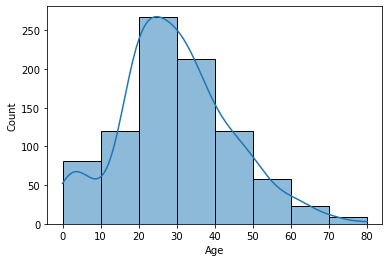

Fare Hist plot 



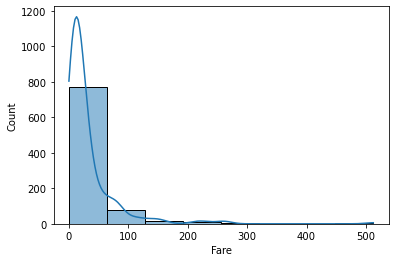

In [39]:
for col in numericals:
    print(col +' Hist plot \n') 
    draw = sns.histplot(data= train, kde= True, x= col, bins=8)
    plt.show()

Fare Hist plot 



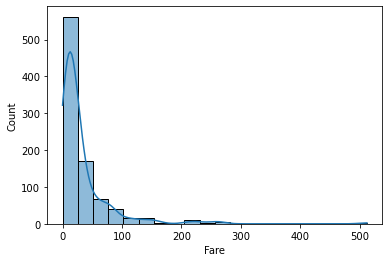

In [33]:
print("Fare Hist plot \n") 
draw = sns.histplot(data= train, kde= True, x= train["Fare"], bins=20)

In [36]:
train[numericals].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.846240,32.204208
std,14.616288,49.693429
min,0.000000,0.000000
25%,21.000000,7.910400
50%,29.000000,14.454200
75%,39.000000,31.000000
max,80.000000,512.329200


In [37]:
460/7.91


58.154235145385584

In [38]:
512.32*58.154

29793.457280000006

In [40]:
expensive= train.loc[train["Fare"]>=300]
expensive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C


In [41]:
expensive= train.loc[train["Fare"]>=200]
expensive

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263.0000,C23 C25 C27,S


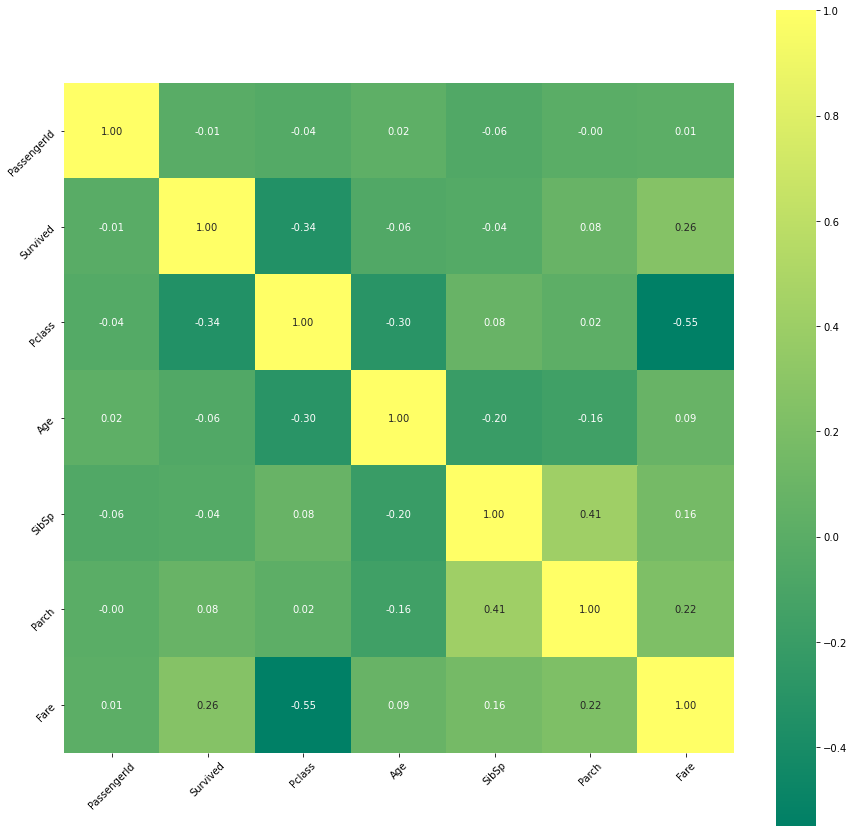

In [44]:
correlation = train.corr(method="pearson")
#HEATMAP
plt.figure(figsize=(15,15)) 

#Genero el mapa de calor
sns.heatmap(correlation, 
            cbar = True, 
            square = True, 
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 10},
            cmap= 'summer') 

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()